# Auto ARIMA Model

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install numpy --upgrade

Requirement already up-to-date: numpy in c:\users\ryanc\anaconda3\lib\site-packages (1.24.4)


In [3]:
!pip install pmdarima --user

In [4]:
import pmdarima as pm

In [5]:
from pmdarima import auto_arima

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
# Importing imputed data

USA_train_imputed = pd.read_csv("USA_train_imputed copy.csv")
USA_test_imputed = pd.read_csv("USA_test_imputed copy.csv")
USA_train_imputed.set_index('date', inplace=True)
USA_test_imputed.set_index('date', inplace=True)

Brazil_train_imputed = pd.read_csv("Brazil_train_imputed copy.csv")
Brazil_test_imputed = pd.read_csv("Brazil_test_imputed copy.csv")
Brazil_train_imputed.set_index('date', inplace=True)
Brazil_test_imputed.set_index('date', inplace=True)

Germany_train_imputed = pd.read_csv("Germany_train_imputed copy.csv")
Germany_test_imputed = pd.read_csv("Germany_test_imputed copy.csv")
Germany_train_imputed.set_index('date', inplace=True)
Germany_test_imputed.set_index('date', inplace=True)

Nigeria_train_imputed = pd.read_csv("Nigeria_train_imputed copy.csv")
Nigeria_test_imputed = pd.read_csv("Nigeria_test_imputed copy.csv")
Nigeria_train_imputed.set_index('date', inplace=True)
Nigeria_test_imputed.set_index('date', inplace=True)

China_train_imputed = pd.read_csv("China_train_imputed copy.csv")
China_test_imputed = pd.read_csv("China_test_imputed copy.csv")
China_train_imputed.set_index('date', inplace=True)
China_test_imputed.set_index('date', inplace=True)

Australia_train_imputed = pd.read_csv("Australia_train_imputed copy.csv")
Australia_test_imputed = pd.read_csv("Australia_test_imputed copy.csv")
Australia_train_imputed.set_index('date', inplace=True)
Australia_test_imputed.set_index('date', inplace=True)

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from statsmodels.tsa.stattools import adfuller

# USA model (Auto ARIMA Univariate)

In [10]:
# Performing second-order differencing on 'new_cases' column to stationze data (as showing in ARIMA model)
USA_train_imputed['new_cases_diff2'] = USA_train_imputed['new_cases'].diff().diff()

# Perform the Augmented Dickey-Fuller test for stationarity on the second-order differenced series
result_diff2 = adfuller(USA_train_imputed['new_cases_diff2'].dropna())

# Print the ADF statistic and p-value
print('ADF Statistic (after second-order differencing):', result_diff2[0])
print('p-value (after second-order differencing):', result_diff2[1])

# Interpret the results
if result_diff2[1] <= 0.05:
    print("Reject the null hypothesis. The second-order differenced series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The second-order differenced series is likely non-stationary.")

ADF Statistic (after second-order differencing): -6.3013091724988115
p-value (after second-order differencing): 3.40678986350552e-08
Reject the null hypothesis. The second-order differenced series is likely stationary.


In [11]:
# Create 'new_cases_diff2' for USA_test_imputed
USA_test_imputed['new_cases_diff2'] = USA_test_imputed['new_cases'].diff().diff()

# Deal with NaN values in train_target
missing_values_train = USA_train_imputed['new_cases_diff2'].isnull()
missing_index_train = USA_train_imputed.index[missing_values_train]
# Fill the missing values for the first two entries with the value from the third entry
USA_train_imputed.loc[missing_index_train, 'new_cases_diff2'] = USA_train_imputed['new_cases_diff2'].iloc[2]

# Deal with NaN values for the test_target
missing_values_test = USA_test_imputed['new_cases_diff2'].isnull()
missing_index_test = USA_test_imputed.index[missing_values_test]
# Fill the missing values for the first two entries with the value from the third entry
USA_test_imputed.loc[missing_index_test, 'new_cases_diff2'] = USA_test_imputed['new_cases_diff2'].iloc[2]

# Set train and test targets
train_target = USA_train_imputed['new_cases_diff2']
test_target = USA_test_imputed['new_cases_diff2']

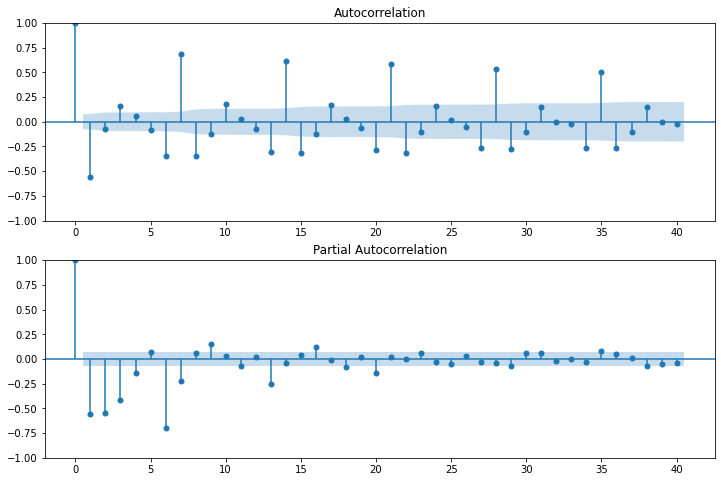

In [12]:
# ACF and PACF plots for 'new_cases_diff2'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sm.graphics.tsa.plot_acf(USA_train_imputed['new_cases_diff2'], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(USA_train_imputed['new_cases_diff2'], lags=40, ax=ax2)

plt.show()

There appears to be some interesting trends. Perhaps some daily seasonality?

In [13]:
# Fit Auto ARIMA model
auto_arima_model = auto_arima(train_target, start_p=1, start_q=1,
                   max_p=7, max_q=7, m=7,
                   start_P=1, seasonal=True,
                   d=1, D=1, test = 'adf', trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=17975.587, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=17287.673, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=17360.020, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=17266.089, Time=0.33 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=17267.058, Time=0.50 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=17266.853, Time=0.33 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=17818.783, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=16890.631, Time=0.29 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=16905.094, Time=0.22 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=16892.324, Time=0.64 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=16892.116, Time=0.38 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=16677.205, Time=0.47 sec
 ARIMA(3,1,0)(1,1,0)[7]        

In [14]:
# Find train RMSE
predictions = auto_arima_model.predict_in_sample()
predictions_diff1 = np.cumsum(predictions)
USA_train_imputed['Auto-ARIMA pred'] = np.cumsum(predictions_diff1)

train_rmse = np.sqrt(mean_squared_error(USA_train_imputed['new_cases'], np.cumsum(predictions_diff1)))
train_rmse

58402.67593149129

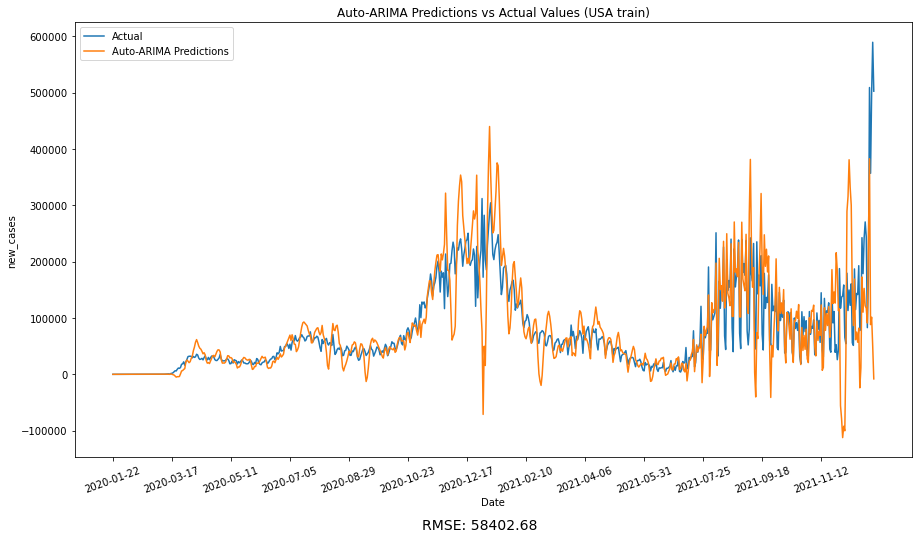

In [15]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(USA_train_imputed['new_cases'], label='Actual')
plt.plot(USA_train_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (USA train)')
xticks_indices = np.arange(0, len(USA_train_imputed), 55) # Select every 55th date for display
xticks_labels = USA_train_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {train_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [16]:
# Find test RMSE
predictions = auto_arima_model.predict(n_periods=len(test_target))
predictions_diff1 = np.cumsum(predictions)
USA_test_imputed['Auto-ARIMA pred'] = np.cumsum(predictions_diff1)

test_rmse = np.sqrt(mean_squared_error(USA_test_imputed['new_cases'], np.cumsum(predictions_diff1)))
test_rmse

3592812.814450613

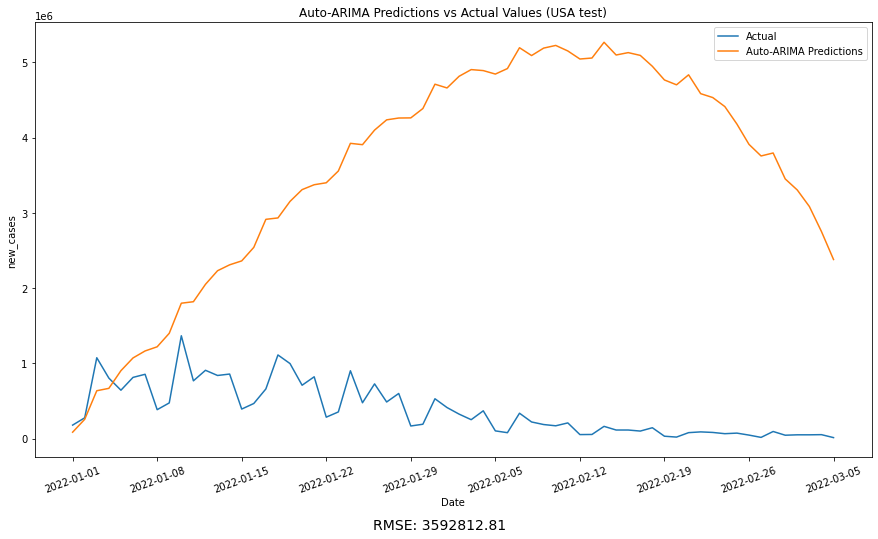

In [17]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(USA_test_imputed['new_cases'], label='Actual')
plt.plot(USA_test_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (USA test)')
xticks_indices = np.arange(0, len(USA_test_imputed), 7) # Select every 7th date for display
xticks_labels = USA_test_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {test_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

# Brazil model (Auto ARIMA Univariate)

In [18]:
# Perform differencing on 'new_cases' column to stationize data
Brazil_train_imputed['new_cases_diff'] = Brazil_train_imputed['new_cases'].diff()

# Perform ADF test for stationarity to verify if data is no stationary
result_diff = adfuller(Brazil_train_imputed['new_cases_diff'].dropna())

# Print the ADF statistic and p-value
print('ADF Statistic (after differencing):', result_diff[0])
print('p-value (after differencing):', result_diff[1])

# Interpret the results
if result_diff[1] <= 0.05:
    print("Reject the null hypothesis. The differenced series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The differenced series is likely non-stationary.")

ADF Statistic (after differencing): -6.766373556463499
p-value (after differencing): 2.7106281419621723e-09
Reject the null hypothesis. The differenced series is likely stationary.


In [19]:
# Create 'new_cases_diff' for Brazil_test_imputed
Brazil_test_imputed['new_cases_diff'] = Brazil_test_imputed['new_cases'].diff()

# Deal with NaN values in train_target
missing_values_train = Brazil_train_imputed['new_cases_diff'].isnull()
missing_index_train = Brazil_train_imputed.index[missing_values_train]
# Fill the missing values for the first two entries with the value from the third entry
Brazil_train_imputed.loc[missing_index_train, 'new_cases_diff'] = Brazil_train_imputed['new_cases_diff'].iloc[1]

# Deal with NaN values for the test_target
missing_values_test = Brazil_test_imputed['new_cases_diff'].isnull()
missing_index_test = Brazil_test_imputed.index[missing_values_test]
# Fill the missing values for the first two entries with the value from the third entry
Brazil_test_imputed.loc[missing_index_test, 'new_cases_diff'] = Brazil_test_imputed['new_cases_diff'].iloc[1]

# Set train and test targets
train_target = Brazil_train_imputed['new_cases_diff']
test_target = Brazil_test_imputed['new_cases_diff']

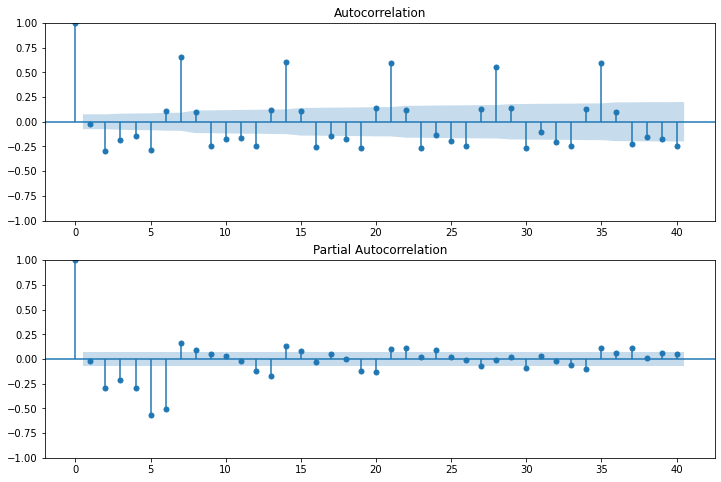

In [20]:
# ACF and PACF plots for 'new_cases_diff'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sm.graphics.tsa.plot_acf(Brazil_train_imputed['new_cases_diff'], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(Brazil_train_imputed['new_cases_diff'], lags=40, ax=ax2)

plt.show()

In [21]:
# Fit Auto ARIMA model
auto_arima_model = auto_arima(train_target, start_p=1, start_q=1,
                   max_p=7, max_q=7, m=7,
                   start_P=1, seasonal=True,
                   d=1, D=1, test = 'adf', trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=15052.260, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=14637.525, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.60 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=14755.286, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=14585.481, Time=0.22 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=14543.490, Time=0.57 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=14541.627, Time=0.30 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=14542.387, Time=0.16 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=14542.450, Time=0.58 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=14541.497, Time=0.25 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=14814.650, Time=0.18 sec
 ARIMA(2,1,0)(0,1,2)[7]             : AIC=14413.357, Time=0.39 sec
 ARIMA(2,1,0)(0,1,1)[7]             : AIC=14414.552, Time=0.19 sec
 ARIMA(2,1,0)(1,1,2)[7]        

In [22]:
# Find train RMSE
predictions = auto_arima_model.predict_in_sample()
Brazil_train_imputed['Auto-ARIMA pred'] = np.cumsum(predictions)

train_rmse = np.sqrt(mean_squared_error(Brazil_train_imputed['new_cases'], np.cumsum(predictions)))
train_rmse

10050.046230048072

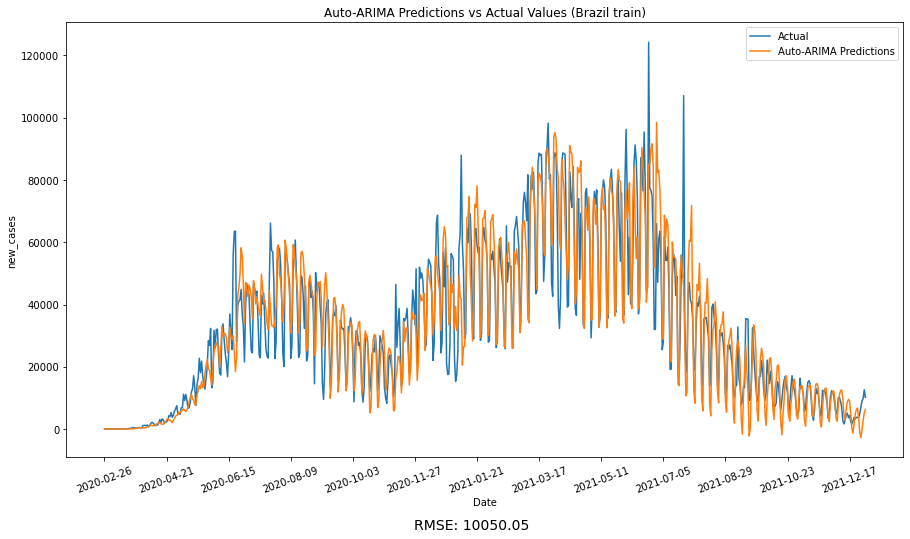

In [23]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(Brazil_train_imputed['new_cases'], label='Actual')
plt.plot(Brazil_train_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (Brazil train)')
xticks_indices = np.arange(0, len(Brazil_train_imputed), 55) # Select every 55th date for display
xticks_labels = Brazil_train_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {train_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [24]:
# Find test RMSE
predictions = auto_arima_model.predict(n_periods=len(test_target))
Brazil_test_imputed['Auto-ARIMA pred'] = np.cumsum(predictions)

test_rmse = np.sqrt(mean_squared_error(Brazil_test_imputed['new_cases'], np.cumsum(predictions)))
test_rmse

107687.23835073471

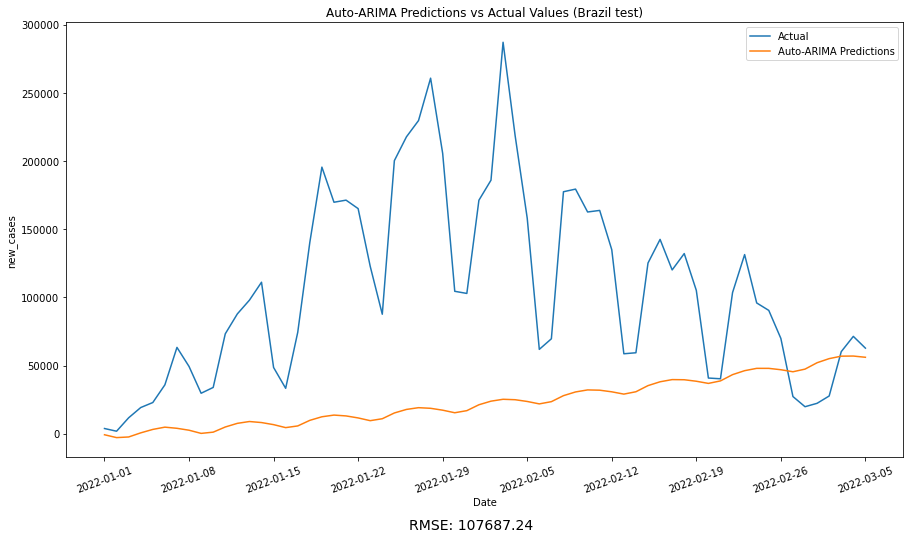

In [25]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(Brazil_test_imputed['new_cases'], label='Actual')
plt.plot(Brazil_test_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (Brazil test)')
xticks_indices = np.arange(0, len(Brazil_test_imputed), 7) # Select every 7th date for display
xticks_labels = Brazil_test_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {test_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

# Germany model (Auto ARIMA Univariate)

In [26]:
# Check to see if data is stationary using ADF test
result = adfuller(Germany_train_imputed['new_cases'])

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis. The 'new_cases' time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The 'new_cases' time series is likely non-stationary.")

ADF Statistic: -3.0337856122622346
p-value: 0.03185745763244454
Reject the null hypothesis. The 'new_cases' time series is likely stationary.


Since the data is already stationary, we can proceed onward without introducing a transformed 'new_cases'

In [27]:
# Set train and test targets
train_target = Germany_train_imputed['new_cases']
test_target = Germany_test_imputed['new_cases']

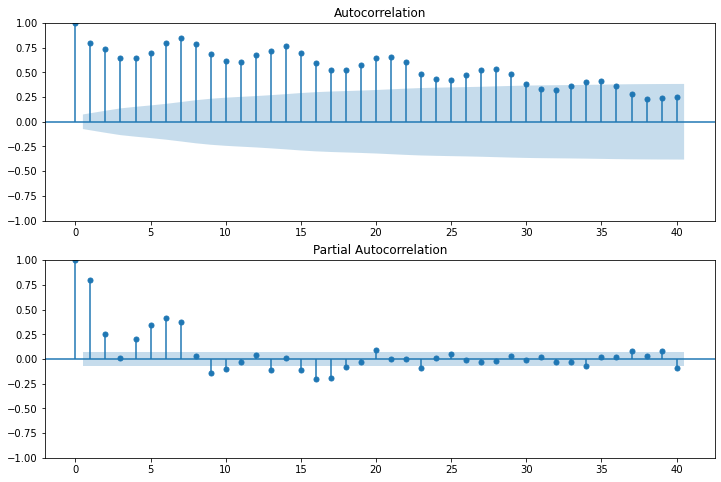

In [28]:
# ACF and PACF plots for 'new_cases_diff2'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sm.graphics.tsa.plot_acf(Germany_train_imputed['new_cases'], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(Germany_train_imputed['new_cases'], lags=40, ax=ax2)

plt.show()

In [29]:
# Fit Auto ARIMA model
auto_arima_model = auto_arima(train_target, start_p=1, start_q=1,
                   max_p=21, max_q=7, m=7,
                   start_P=1, seasonal=True,
                   d=1, D=1, test = 'adf', trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=14233.098, Time=0.41 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=14898.788, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=14412.924, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=14258.158, Time=0.27 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=14195.144, Time=0.59 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=14356.035, Time=0.35 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=14234.490, Time=0.46 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=14270.533, Time=0.21 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=1.18 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=14336.591, Time=0.36 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=14234.776, Time=0.40 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=14223.291, Time=0.84 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=14591.434, Time=0.30 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=14231.458, Time=0.35 sec
 ARIMA(2,1,0)(0,1,1)[7]  

In [30]:
# Find train RMSE
predictions = auto_arima_model.predict_in_sample()
Germany_train_imputed['Auto-ARIMA pred'] = predictions

train_rmse = np.sqrt(mean_squared_error(Germany_train_imputed['new_cases'], predictions))
train_rmse

6321.070768806541

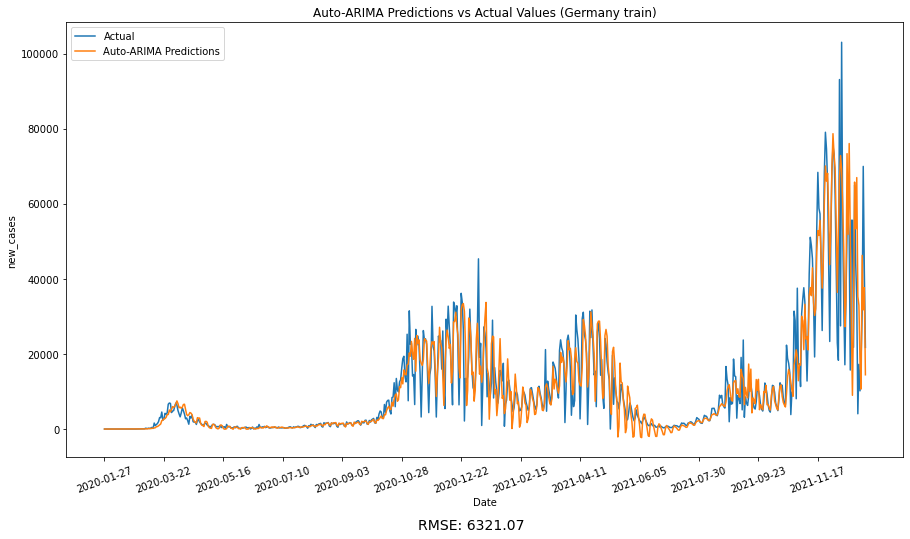

In [31]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(Germany_train_imputed['new_cases'], label='Actual')
plt.plot(Germany_train_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (Germany train)')
xticks_indices = np.arange(0, len(Germany_train_imputed), 55) # Select every 55th date for display
xticks_labels = Germany_train_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {train_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [32]:
# Find test RMSE
predictions = auto_arima_model.predict(n_periods=len(test_target))
Germany_test_imputed['Auto-ARIMA pred'] = predictions

test_rmse = np.sqrt(mean_squared_error(Germany_test_imputed['new_cases'], predictions))
test_rmse

151007.60802092135

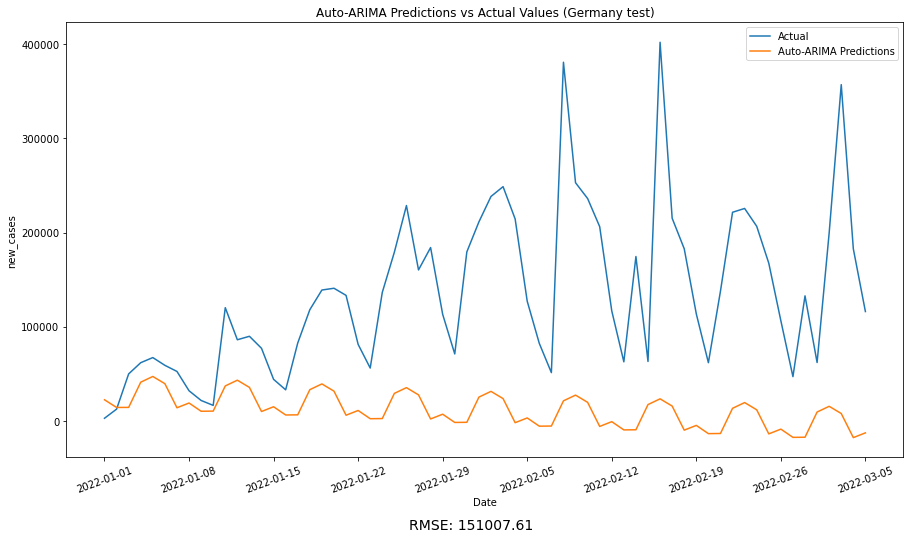

In [33]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(Germany_test_imputed['new_cases'], label='Actual')
plt.plot(Germany_test_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (Germany test)')
xticks_indices = np.arange(0, len(Germany_test_imputed), 7) # Select every 7th date for display
xticks_labels = Germany_test_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {test_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

# China model (Auto ARIMA Univariate)

In [34]:
# Check to see if data is stationary using ADF test
result = adfuller(China_train_imputed['new_cases'])

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis. The 'new_cases' time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The 'new_cases' time series is likely non-stationary.")

ADF Statistic: -7.5297590149143385
p-value: 3.604559833670165e-11
Reject the null hypothesis. The 'new_cases' time series is likely stationary.


Since the data is already stationary, we can proceed onward without introducing a transformed 'new_cases'

In [35]:
# Set train and test targets
train_target = China_train_imputed['new_cases']
test_target = China_test_imputed['new_cases']

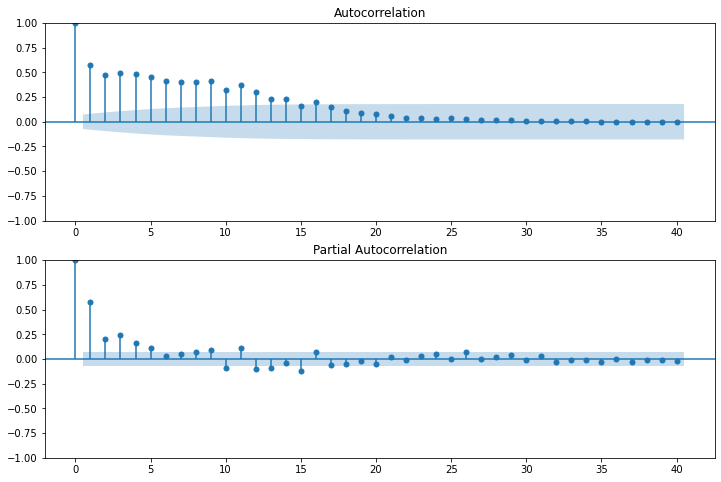

In [36]:
# ACF and PACF plots for 'new_cases_diff2'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sm.graphics.tsa.plot_acf(China_train_imputed['new_cases'], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(China_train_imputed['new_cases'], lags=40, ax=ax2)

plt.show()

In [37]:
# Fit Auto ARIMA model
auto_arima_model = auto_arima(train_target, start_p=1, start_q=1,
                   max_p=15, max_q=5, m=1,
                   start_P=1, seasonal=True,
                   d=1, D=1, test = 'adf', trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11052.371, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11297.570, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11193.852, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11057.824, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11295.571, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11048.677, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11111.966, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11050.673, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11049.882, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11048.991, Time=0.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11078.309, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11050.349, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11046.681, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11050.383, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0

In [38]:
# Find train RMSE
predictions = auto_arima_model.predict_in_sample()
China_train_imputed['Auto-ARIMA pred'] = predictions

train_rmse = np.sqrt(mean_squared_error(China_train_imputed['new_cases'], predictions))
train_rmse

580.6842640529946

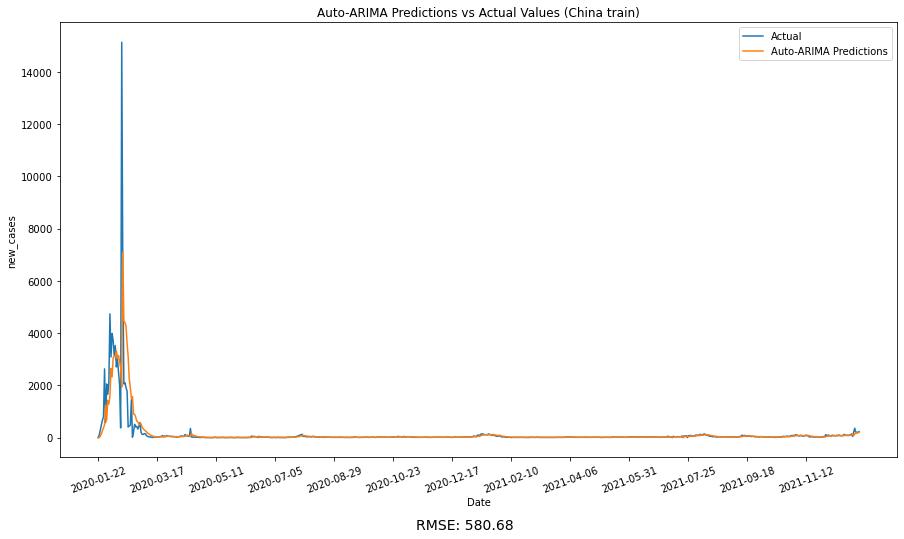

In [39]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(China_train_imputed['new_cases'], label='Actual')
plt.plot(China_train_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (China train)')
xticks_indices = np.arange(0, len(China_train_imputed), 55) # Select every 55th date for display
xticks_labels = China_train_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {train_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [40]:
# Find test RMSE
predictions = auto_arima_model.predict(n_periods=len(test_target))
China_test_imputed['Auto-ARIMA pred'] = predictions

test_rmse = np.sqrt(mean_squared_error(China_test_imputed['new_cases'], predictions))
test_rmse

102.3201013563689

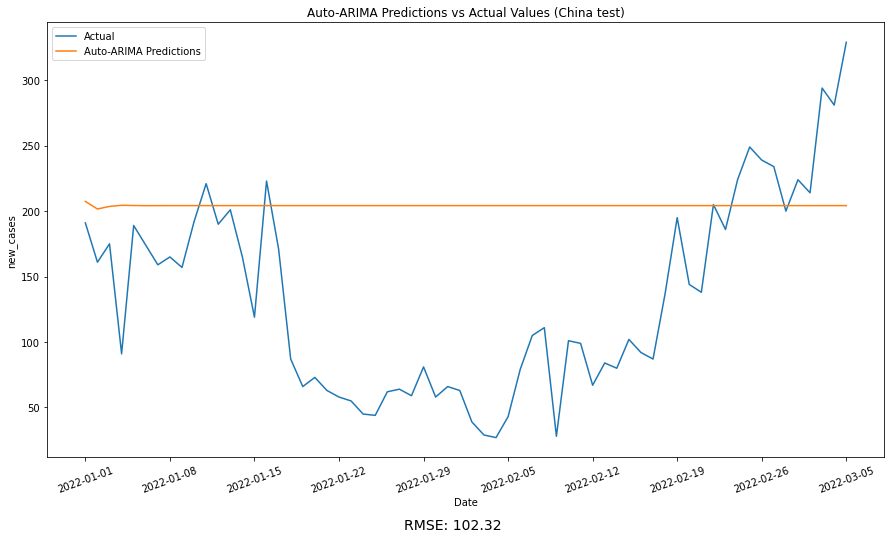

In [41]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(China_test_imputed['new_cases'], label='Actual')
plt.plot(China_test_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (China test)')
xticks_indices = np.arange(0, len(China_test_imputed), 7) # Select every 7th date for display
xticks_labels = China_test_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {test_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

# Nigeria model (Auto ARIMA Univariate)

In [42]:
# Check to see if data is stationary using ADF test
result = adfuller(Nigeria_train_imputed['new_cases'])

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis. The 'new_cases' time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The 'new_cases' time series is likely non-stationary.")

ADF Statistic: -2.9077023883038535
p-value: 0.04445961806463605
Reject the null hypothesis. The 'new_cases' time series is likely stationary.


Since the data is already stationary, we can proceed onward without introducing a transformed 'new_cases'

In [43]:
# Set train and test targets
train_target = Nigeria_train_imputed['new_cases']
test_target = Nigeria_test_imputed['new_cases']

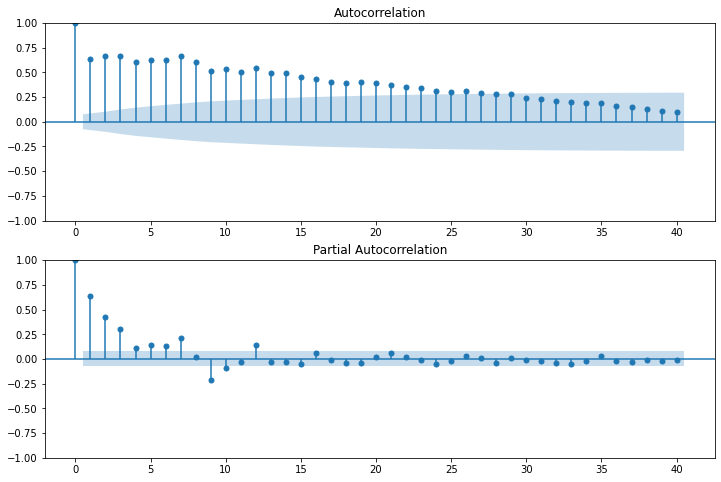

In [44]:
# ACF and PACF plots for 'new_cases_diff2'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sm.graphics.tsa.plot_acf(Nigeria_train_imputed['new_cases'], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(Nigeria_train_imputed['new_cases'], lags=40, ax=ax2)

plt.show()

In [45]:
# Fit Auto ARIMA model
auto_arima_model = auto_arima(train_target, start_p=1, start_q=1,
                   max_p=21, max_q=7, m=1,
                   start_P=1, seasonal=True,
                   d=1, D=1, test = 'adf', trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9562.825, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9930.209, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9710.027, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9567.321, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9928.210, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9564.258, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9569.258, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9562.495, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9564.387, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9564.976, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9560.781, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9565.684, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9567.623, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=9562.664, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [46]:
# Find train RMSE
predictions = auto_arima_model.predict_in_sample()
Nigeria_train_imputed['Auto-ARIMA pred'] = predictions

train_rmse = np.sqrt(mean_squared_error(Nigeria_train_imputed['new_cases'], predictions))
train_rmse

295.54949016858546

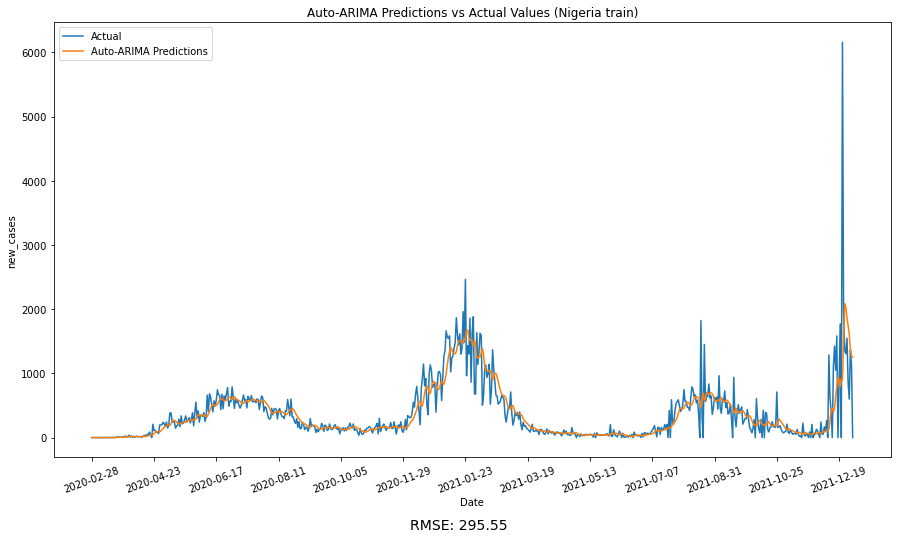

In [47]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(Nigeria_train_imputed['new_cases'], label='Actual')
plt.plot(Nigeria_train_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (Nigeria train)')
xticks_indices = np.arange(0, len(Nigeria_train_imputed), 55) # Select every 55th date for display
xticks_labels = Nigeria_train_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {train_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [48]:
# Find test RMSE
predictions = auto_arima_model.predict(n_periods=len(test_target))
Nigeria_test_imputed['Auto-ARIMA pred'] = predictions

test_rmse = np.sqrt(mean_squared_error(Nigeria_test_imputed['new_cases'], predictions))
test_rmse

798.6282452968399

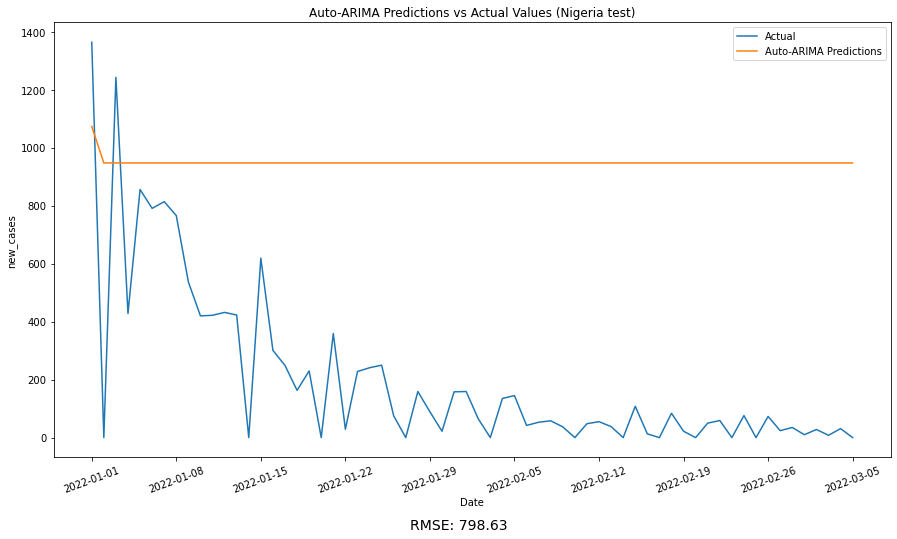

In [49]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(Nigeria_test_imputed['new_cases'], label='Actual')
plt.plot(Nigeria_test_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (Nigeria test)')
xticks_indices = np.arange(0, len(Nigeria_test_imputed), 7) # Select every 7th date for display
xticks_labels = Nigeria_test_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {test_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

# Australia model (Auto ARIMA Univariate)

In [50]:
# Since first-order differencing made the ADF statistic higher, we will opt for a different transformation. 
# Instead trying a log transform while also adding a small constant since a log transformation is not defined for zero or negative values. 
small_constant = 1e-10
Australia_train_imputed['new_cases_log'] = np.log(Australia_train_imputed['new_cases'] + small_constant)

# Perform the Augmented Dickey-Fuller test for stationarity on the log-transformed series
result_log = adfuller(Australia_train_imputed['new_cases_log'].dropna())

# Print the ADF statistic and p-value
print('ADF Statistic (after log transformation):', result_log[0])
print('p-value (after log transformation):', result_log[1])

# Interpret the results
if result_log[1] <= 0.05:
    print("Reject the null hypothesis. The log-transformed series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The log-transformed series is likely non-stationary.")

ADF Statistic (after log transformation): -6.76685604217936
p-value (after log transformation): 2.7033969063111766e-09
Reject the null hypothesis. The log-transformed series is likely stationary.


In [51]:
# Add 'new_cases_log' to the Australia_test_imputed data
small_constant = 1e-10
Australia_test_imputed['new_cases_log'] = np.log(Australia_test_imputed['new_cases'] + small_constant)

# Set train and test targets
train_target = Australia_train_imputed['new_cases_log']
test_target = Australia_test_imputed['new_cases_log']

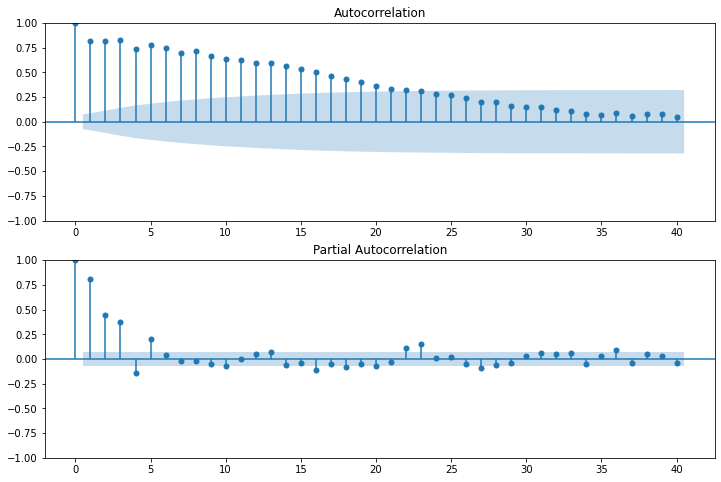

In [52]:
# ACF and PACF plots for 'new_cases_log'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sm.graphics.tsa.plot_acf(Australia_train_imputed['new_cases_log'], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(Australia_train_imputed['new_cases_log'], lags=40, ax=ax2)

plt.show()

In [53]:
# Fit Auto ARIMA model
auto_arima_model = auto_arima(train_target, start_p=1, start_q=1,
                   max_p=20, max_q=5, m=1,
                   start_P=1, seasonal=True,
                   d=1, D=1, test = 'adf', trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3460.735, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3761.734, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3558.815, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3467.438, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3759.744, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3389.519, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3414.016, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3391.506, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3391.451, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3450.457, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3401.843, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3383.693, Time=0.36 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3367.182, Time=0.66 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3366.579, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept

In [54]:
# Find train RMSE
predictions = auto_arima_model.predict_in_sample()
Australia_train_imputed['Auto-ARIMA pred'] = np.exp(predictions)

train_rmse = np.sqrt(mean_squared_error(Australia_train_imputed['new_cases'], np.exp(predictions)))
train_rmse

4758.607840316242

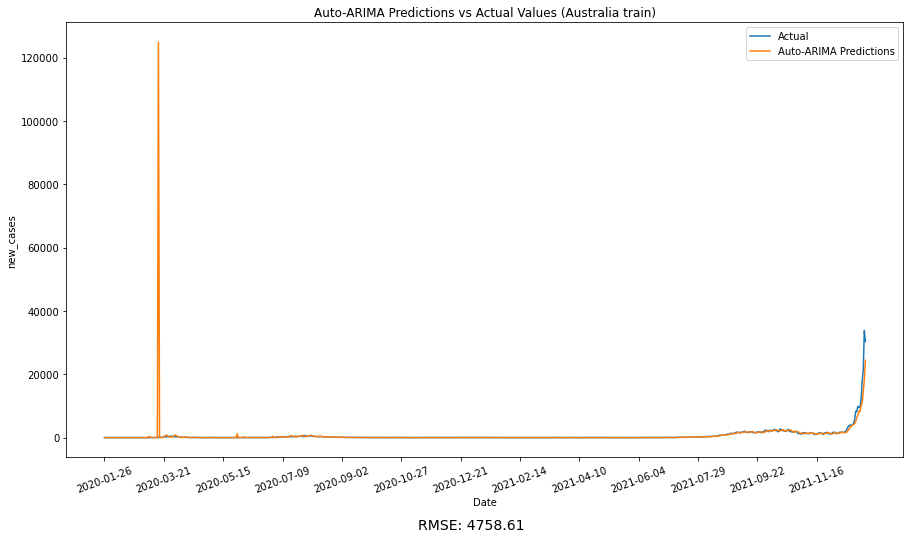

In [55]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(Australia_train_imputed['new_cases'], label='Actual')
plt.plot(Australia_train_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (Australia train)')
xticks_indices = np.arange(0, len(Australia_train_imputed), 55) # Select every 55th date for display
xticks_labels = Australia_train_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {train_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

In [56]:
# Find test RMSE
predictions = auto_arima_model.predict(n_periods=len(test_target))
Australia_test_imputed['Auto-ARIMA pred'] = np.exp(predictions)

test_rmse = np.sqrt(mean_squared_error(Australia_test_imputed['new_cases'], np.exp(predictions)))
test_rmse

36194.91175086179

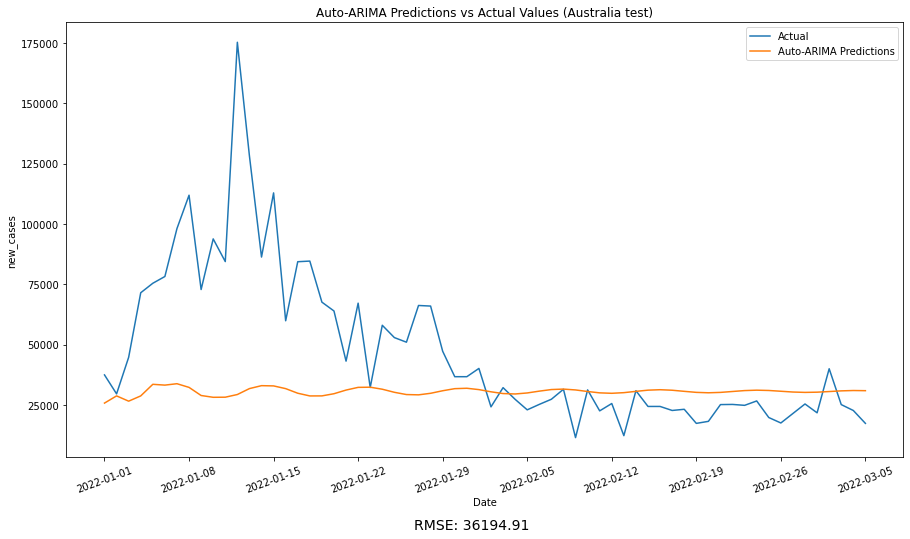

In [57]:
# Create plot visualization
plt.figure(figsize=(15, 8))
plt.plot(Australia_test_imputed['new_cases'], label='Actual')
plt.plot(Australia_test_imputed['Auto-ARIMA pred'], label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('Auto-ARIMA Predictions vs Actual Values (Australia test)')
xticks_indices = np.arange(0, len(Australia_test_imputed), 7) # Select every 7th date for display
xticks_labels = Australia_test_imputed.index[xticks_indices]
plt.xticks(xticks_indices, xticks_labels, rotation=20)
plt.legend()
rmse_text = f'RMSE: {test_rmse:.2f}'
plt.figtext(0.5, 0.001, rmse_text, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()